# Extract all Copernicus Land products via API and create a nicely formatted text file

In [1]:
import requests
import json

# Define the URL
url = "https://land.copernicus.eu/++api++/en/dataset-catalog/@querystring-search?query={%22metadata_fields%22:%22_all%22,%22b_size%22:%22200%22,%22query%22:[{%22i%22:%22portal_type%22,%22o%22:%22plone.app.querystring.operation.selection.any%22,%22v%22:[%22DataSet%22]}],%22b_start%22:0}"

# Make the GET request
response = requests.get(url)
# Raise an exception if the request failed
response.raise_for_status()

# Parse the JSON data
json_data = response.json()



In [2]:
import pandas as pd 
df = pd.DataFrame(json_data["items"])
df

,@id,@type,CreationDate,Creator,Date,Description,EffectiveDate,ExpirationDate,Language,ModificationDate,...,taxonomy_user_profile_sector_of_activity,taxonomy_user_profile_thematic_activity,taxonomy_userprofileinstitutionaldomain,taxonomy_userprofileproductuseintention,taxonomy_userprofileprofessionalthematicdomain,title,total_comments,type_title,url,version
0,https://land.copernicus.eu/en/products/water-b...,DataSet,2021-12-01T10:41:30+01:00,admin,2022-01-21T12:07:15+01:00,"On a daily basis, classifies pixels of Contine...",2022-01-21T12:07:15+01:00,None,,2024-11-28T12:42:07+01:00,...,[],[],[],[],[],"Lake Ice Extent 2024-present (raster 250 m), E...",0,DataSet,None,None
1,https://land.copernicus.eu/en/products/europea...,DataSet,2022-01-10T16:00:20+02:00,admin,2024-07-29T10:52:08+02:00,Provides at pan-European level one cloud-free ...,2024-07-29T10:52:08+02:00,None,en,2024-08-09T07:59:04+02:00,...,[],[],[],[],[],Very High Resolution Image Mosaic 2021 True Co...,0,DataSet,None,None
2,https://land.copernicus.eu/en/products/water-b...,DataSet,2024-09-05T09:39:13+01:00,ghitab,2024-09-05T12:20:09+01:00,Provides semi-continuous observations for a la...,2024-09-05T12:20:09+01:00,None,,2024-11-26T15:28:19+01:00,...,[],[],[],[],[],Lake Water Quality 2024-present (raster 300 m)...,0,DataSet,None,None
3,https://land.copernicus.eu/en/products/europea...,DataSet,2023-11-24T14:10:01+01:00,ischueug,2023-11-28T15:57:50+01:00,Provides InSAR displacement data provided in t...,2023-11-28T15:57:50+01:00,None,en,2024-11-06T10:01:20+01:00,...,[],[],[],[],[],European Ground Motion Service: Basic 2019-202...,0,DataSet,None,None
4,https://land.copernicus.eu/en/products/clc-bac...,DataSet,2023-01-31T13:10:54+01:00,n001znto,2023-05-15T12:40:00+01:00,Provides pan-European wall-to-wall spatially d...,2023-05-15T12:40:00+01:00,None,,2024-11-26T13:23:06+01:00,...,[],[],[],[],[],"CLC+Backbone 2021 (raster 10 m), Europe, 3-yearly",0,DataSet,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,https://land.copernicus.eu/en/products/vegetat...,DataSet,2021-10-22T09:54:56+01:00,admin,2021-03-15T08:21:00+01:00,Based upon SPOT/VEGETATION and PROBA-V NDVI 1k...,2021-03-15T08:21:00+01:00,None,,2024-11-26T15:39:39+01:00,...,[],[],[],[],[],Normalised Difference Vegetation Index (Long T...,0,DataSet,None,None
186,https://land.copernicus.eu/en/products/water-b...,DataSet,2024-09-05T09:16:11+01:00,ghitab,2024-09-05T12:20:08+01:00,Provides semi-continuous observations for a la...,2024-09-05T12:20:08+01:00,None,,2024-11-26T15:28:05+01:00,...,[],[],[],[],[],Lake Water Quality 2024-present (raster 100 m)...,0,DataSet,None,None
187,https://land.copernicus.eu/en/products/vegetat...,DataSet,2021-12-01T10:42:02+01:00,admin,2023-10-30T12:07:00+01:00,Provides the amount of carbon retained in an e...,2023-10-30T12:07:00+01:00,None,,2024-11-26T15:52:14+01:00,...,[],[],[],[],[],Net Primary Production 2023-present (raster 30...,0,DataSet,None,None
188,https://land.copernicus.eu/en/products/high-re...,DataSet,2021-12-01T10:38:00+01:00,admin,2022-01-21T12:06:36+01:00,Provides at pan-European level in the spatial ...,2022-01-21T12:06:36+01:00,None,en,2024-11-26T13:25:37+01:00,...,[],[],[],[],[],Impervious Built-up 2018 (raster 10 m and 100 ...,0,DataSet,None,None


In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)
df.Description

0                                                                                                                                                                                                                                                                                                                             Provides at pan-European level one cloud-free very high resolution optical coverage for the 2021 reference year, acquired within predefined windows corresponding to the vegetation season in 2020-2021-2022. The very high resolution images are obtained from various missions and have a spatial resolution from 2 m to maximum 4 m.
1                                                                                                                                                                                                                                                                                                                                                                 

In [39]:
df["length"] = df["Description"].apply(lambda x: len(x))
df

,@id,@type,CreationDate,Creator,Date,Description,EffectiveDate,ExpirationDate,Language,ModificationDate,Subject,Title,TranslationGroup,Type,UID,author_name,cmf_uid,commentators,created,description,downloadable_dataset,effective,end,exclude_from_nav,expires,getIcon,getId,getObjSize,getPath,getRemoteUrl,getURL,hasPreviewImage,head_title,id,image_field,image_scales,in_response_to,is_folderish,last_comment_date,latitude,listCreators,location,longitude,mapviewer_viewservice,meta_type,mime_type,modified,nav_title,ondemand,portal_type,procurement_no,publication_date,review_state,start,submission_deadline,sync_uid,taxonomy_faqcategories,taxonomy_technical_library_categorization,taxonomy_use_case_spatial_coverage,taxonomy_user_profile_affiliation,taxonomy_user_profile_country,taxonomy_user_profile_sector_of_activity,taxonomy_user_profile_thematic_activity,taxonomy_userprofileinstitutionaldomain,taxonomy_userprofileproductuseintention,taxonomy_userprofileprofessionalthematicdomain,title,total_comments,type_title,url,version,length
0,https://land.copernicus.eu/en/products/european-image-mosaic/very-high-resolution-image-mosaic-2021-true-colour-2m,DataSet,2022-01-10T16:00:20+02:00,admin,2024-07-29T10:52:08+02:00,"Provides at pan-European level one cloud-free very high resolution optical coverage for the 2021 reference year, acquired within predefined windows corresponding to the vegetation season in 2020-2021-2022. The very high resolution images are obtained from various missions and have a spatial resolution from 2 m to maximum 4 m.",2024-07-29T10:52:08+02:00,None,en,2024-08-09T07:59:04+02:00,[],"Very High Resolution Image Mosaic 2021 True Colour (raster 2 m), Europe",a7f2aa6ff75b457cadbc507324b0c34b,DataSet,c0b301ebe1fa40da8117ca6f13240baa,None,1473,[],2022-01-10T14:00:20+00:00,"Provides at pan-European level one cloud-free very high resolution optical coverage for the 2021 reference year, acquired within predefined windows corresponding to the vegetation season in 2020-2021-2022. The very high resolution images are obtained from various missions and have a spatial resolution from 2 m to maximum 4 m.",False,2024-07-29T08:52:08+00:00,None,False,2499-12-30T22:00:00+00:00,True,very-high-resolution-image-mosaic-2021-true-colour-2m,41.2 KB,/Plone/en/products/european-image-mosaic/very-high-resolution-image-mosaic-2021-true-colour-2m,None,https://land.copernicus.eu/en/products/european-image-mosaic/very-high-resolution-image-mosaic-2021-true-colour-2m,None,None,very-high-resolution-image-mosaic-2021-true-colour-2m,image,"{'image': [{'content-type': 'image/jpeg', 'download': '@@images/image-400-ec0c633769b9b7ea393d9039b0c08d82.jpeg', 'filename': 'vhr-2021-thumbnail.jpg', 'height': 289, 'scales': {'big': {'download': '@@images/image-80-44889e28271c4e18830fac83cf562d74.jpeg', 'height': 57, 'width': 80}, 'icon': {'download': '@@images/image-32-5c4a174577de3f3f0bd5ff2aa43341ed.jpeg', 'height': 23, 'width': 32}, 'medium': {'download': '@@images/image-60-8658d85fd6206f1e6257d3142e5df722.jpeg', 'height': 43, 'width': 60}, 'mini': {'download': '@@images/image-200-249fbdcf13294f0c06dad1d1fd409b5c.jpeg', 'height': 144, 'width': 200}, 'preview': {'download': '@@images/image-400-21c7fb6fec4a3089555ae2034e78be3f.jpeg', 'height': 289, 'width': 400}, 'small': {'download': '@@images/image-48-0f52db7e58534085b748810be695e13f.jpeg', 'height': 34, 'width': 48}, 'thumb': {'download': '@@images/image-128-9d715b2ae9ceeae11b8a1adeaa7a274a.jpeg', 'height': 92, 'width': 128}, 'tile': {'download': '@@images/image-64-4da809fe1828ca189dfd006cba597d8c.jpeg', 'height': 46, 'width': 64}, 'tiny': {'download': '@@images/image-24-1665e776e2b029d2d2caebb65f54be29.jpeg', 'height': 17, 'width': 24}}, 'size': 38063, 'width': 400}]}",None,True,None,None,[admin],None,None,https://image.discomap.eea.europa.eu/arcgis/services/GioLand/VHR_2021_LAEA/ImageServer/WMSServer,Dexterity Container,text/plain,2024-08-09T05:59:04+00:00,None,None,DataSet,None,None,published,None,None,None,[],[],

### Quick check whether the descriptions are all more or less of the same length

<Axes: >

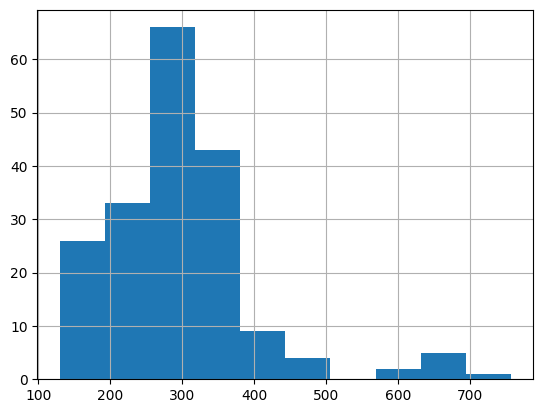

In [40]:
df["length"].hist()

In [3]:
df = df[["Title", "Description", "@id"]]
df.head(2)

,Title,Description,@id
0,"Lake Ice Extent 2024-present (raster 250 m), E...","On a daily basis, classifies pixels of Contine...",https://land.copernicus.eu/en/products/water-b...
1,Very High Resolution Image Mosaic 2021 True Co...,Provides at pan-European level one cloud-free ...,https://land.copernicus.eu/en/products/europea...


In [53]:
for index, row in df.iterrows():
    for col in ["Title", "Description", "@id"]:
        print(row[col])
    print("---")

Very High Resolution Image Mosaic 2021 True Colour (raster 2 m), Europe
Provides at pan-European level one cloud-free very high resolution optical coverage for the 2021 reference year, acquired within predefined windows corresponding to the vegetation season in 2020-2021-2022. The very high resolution images are obtained from various missions and have a spatial resolution from 2 m to maximum 4 m.
https://land.copernicus.eu/en/products/european-image-mosaic/very-high-resolution-image-mosaic-2021-true-colour-2m
---
Lake Water Quality 2024-present (raster 300 m), global, 10-daily – version 2
Provides semi-continuous observations for a large number of medium and large-sized lakes. 10-daily observations are available in near real time at 300 m spatial resolution from September 2024 to present.
https://land.copernicus.eu/en/products/water-bodies/lake-water-quality-near-real-time-v2-0-300m
---
European Ground Motion Service: Basic 2019-2023 (vector), Europe, yearly
Provides InSAR displacement

In [4]:
with open("copernicus_land_products.txt", "w") as file:
    for index, row in df.iterrows():
        for col in ["Title", "Description", "@id"]:
            file.write(f"{row[col]}\n")
        file.write("---\n")
